# Extra Credit (6 pts) - Hidden Markov Models

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# single_channel.npy is in the homework/ folder along with this notebook
current_pA = np.load('single_channel.npy')
time_ms = np.arange(len(current_pA)) * 0.2

current_pA.shape

(100000,)

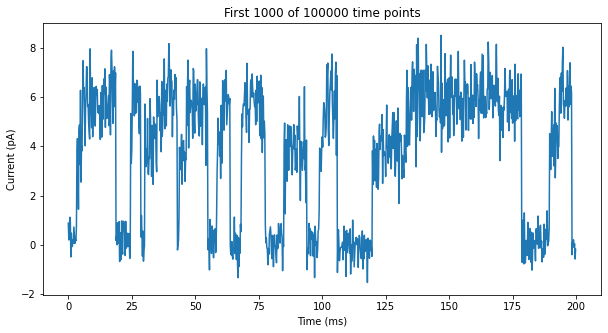

In [13]:
n = 1000
plt.figure(figsize=(10,5))
plt.plot(time_ms[:n], current_pA[:n])
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')
plt.title(f'First {n} of {len(current_pA)} time points');

1. (2 pts) Postulate an HMM with three states that might explain the `current_pA` data. Build and bake this model using pomegranate. Use normally distributed state emissions.

In [14]:
import pomegranate as pom

hmm = pom.HiddenMarkovModel()

C = pom.State(pom.NormalDistribution(0, 1), name='Closed')
O1 = pom.State(pom.NormalDistribution(4, 1), name='Open1')
O2 = pom.State(pom.NormalDistribution(6, 1), name='Open2')
hmm.add_states([C, O1, O2])

hmm.add_transition(hmm.start, C, 0.5)
hmm.add_transition(hmm.start, O1, 0.25)
hmm.add_transition(hmm.start, O2, 0.25)

hmm.add_transition(C, C, 0.95)
hmm.add_transition(C, O1, 0.05)
hmm.add_transition(O1, C, 0.05)
hmm.add_transition(O1, O1, 0.9)
hmm.add_transition(O1, O2, 0.05)
hmm.add_transition(O2, C, 0.05)
hmm.add_transition(O2, O2, 0.95)

hmm.bake()

hmmStateNames = [state.name for state in hmm.states]

2. (2 pts) Train/Optimize your model for the entire current trace using the Baum-Welch algorithm (if this is too much for your computer, use as many points as your machine can reasonably handle). Report the 3x3 matrix of optimized transition probabilities (use a Pandas dataframe so it looks nice, make sure rows and columns are labeled with the correct state names).

In [15]:
hmm.fit([current_pA], algorithm='baum-welch');

In [16]:
import pandas as pd
df = pd.DataFrame(hmm.dense_transition_matrix(), index=hmmStateNames, columns=hmmStateNames)
states = ['Closed', 'Open1', 'Open2']
df.loc[states,states]

,Closed,Open1,Open2
Closed,0.960200,0.039800,0.000000
Open1,0.010621,0.938786,0.050593
Open2,0.019529,0.000000,0.980471


3. (2 pts) Plot the first 1000 data points for the current as a semitransparent line and overlay a scatter plot of the same points color-coded by the prediction of the HMM for which state each data point belongs to.

In [18]:
predictedStateSequence = hmm.predict(current_pA)

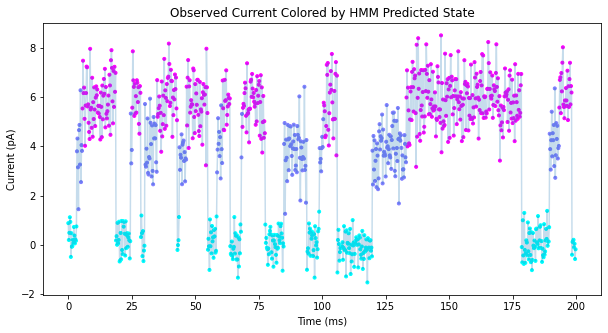

In [19]:
n = 1000
plt.figure(figsize=(10,5))
plt.plot(time_ms[:n], current_pA[:n], alpha=0.25)
plt.scatter(time_ms[:n], current_pA[:n], marker='.', c=predictedStateSequence[:n], cmap='cool')
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')
plt.title('Observed Current Colored by HMM Predicted State');